In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_predict


In [3]:
def scaleData(dataFrame,flag):
    df = dataFrame.copy()

    for var in df:
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df

In [4]:
dfProbeA = pd.read_csv('./UKSA/probeA.csv', header = 0)
dfScProbeA = scaleData(dfProbeA, 1)

dfProbeB = pd.read_csv('./UKSA/probeB.csv', header = 0)
dfScProbeB = scaleData(dfProbeB, 1)

dfClassA = pd.read_csv('./UKSA/classA.csv', header = 0)


In [5]:
featureCols = ['c1','c2','c3','m1','m2','m3','n1','n2','n3','p1','p2','p3']
dfTrain = dfProbeA[featureCols]
dfTarget = dfProbeA[['TNA']]

dfSc = scaleData(dfTrain, 1)


In [6]:
k_range = range(1, 5)
k_scores = []
for k in k_range:
    dTree = tree.DecisionTreeRegressor(max_features = k, max_depth = 1)
    scores = cross_val_score(dTree, dfSc, dfTarget, cv=10, scoring='r2')
    k_scores.append(scores.mean())
    print (k, scores.mean())
print(np.amin(k_scores))

1 0.00943470154694
2 0.0849125374575
3 0.101242769456
4 0.267864140953
0.00943470154694


In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfSc, dfTarget, test_size = .1, random_state=0)


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array w

0.541273888328


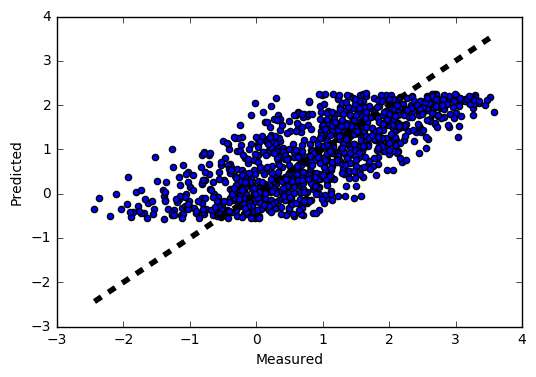

In [8]:
fold = 10

ridge = sk.LassoCV(alphas = np.logspace(-4, -0.5, 30))
scores = cross_val_score(ridge, dfSc, dfTarget, cv=fold, scoring='r2')
predict = cross_val_predict(ridge, dfSc, dfTarget, cv=fold)

print (scores.mean())
fig, ax = plt.subplots()
ax.scatter(dfTarget, predict)
ax.plot([dfTarget.min(), dfTarget.max()], [dfTarget.min(), dfTarget.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



In [9]:


lasso = sk.LassoCV(alphas=np.arange(-20,20,0.05))
lasso.fit(dfScProbeA, dfClassA)
print (lasso.alpha_, lasso.coef_)



2.84217094304e-13 [  2.83721656e-01  -1.08913679e-03  -7.26627185e-03   2.12288030e-02
  -1.12542364e-02   1.22678519e-02   1.17584052e-02   6.29618787e-02
  -1.13789969e-02   3.26000197e-02  -2.47028139e-03   1.32439218e-01
   1.83365899e-04]


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.38306101197
0.441781022462


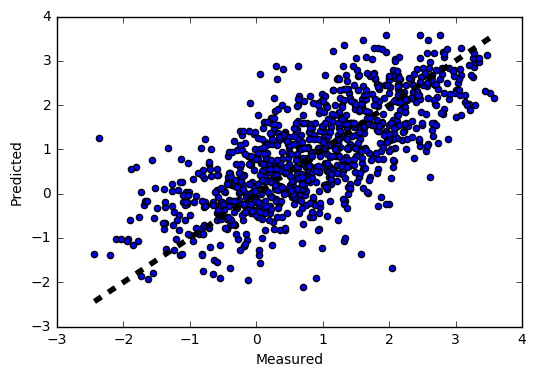

In [20]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
scores = cross_val_score(dTree, dfSc, dfTarget, cv=fold, scoring='r2')
print (scores.mean())

predict = cross_val_predict(dTree, dfSc, dfTarget, cv=fold)
print(r2_score(dfTarget, predict)) 
fig, ax = plt.subplots()
ax.scatter(dfTarget, predict)
ax.plot([dfTarget.min(), dfTarget.max()], [dfTarget.min(), dfTarget.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



np.savetxt("myshame.csv", predict, delimiter=",")


In [ ]:
dTree = tree.DecisionTreeRegressor(max_depth = 1)
dTree.fit(dfSc, dfTarget)
predictedSet = (dTree.predict(dfScProbeB))



In [ ]:
#predicting

In [ ]:
#print (y_test)
predictedSet = (ridge.predict(X_test))
totalLoss = 0

#print (y_test, predictedSet)
#print(y_test['TNA'].iloc[299])
#print (predictedSet[299])
for index, list in enumerate(predictedSet):
    #print (predictedSet[x])
    #print (y_test['TNA'].iloc[index], '---', list[0])
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss
print (totalLoss/len(predictedSet))

In [ ]:
predictedSet = (lasso.predict(X_test))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))

In [ ]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
dTree.fit(X_train, y_train)

predictedSet = (dTree.predict(X_test))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))




In [ ]:
k = 10
kf = KFold(len(dfSc),k)
sum_accuracy = 0

    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
for train, test in kf:
    trainingDf = dfSc.iloc[train].copy()
    testingDf = dfSc.iloc[test].copy()
    trainingDfTarget = dfTarget.iloc[train].copy()
    testingDfTarget = dfTarget.iloc[test].copy()

    #training = training.drop(8, 1)

    #trainingDf = scaleData(trainingDf,1)
    #testingDf = scaleData(testingDf, 1)

    target = trainingDfTarget.as_matrix()
    training = trainingDf.as_matrix()
    testingTarget = testingDfTarget.as_matrix()
    testing = testingDf.as_matrix()
    target = target.squeeze()

    dTree = tree.DecisionTreeRegressor(max_features = 3)
    dTree.fit(training, target)

    predictVal = ((dTree.predict(testing)))
    #predictProb =  knn_model.predict_proba(testing)
    #confusion = metrics.confusion_matrix(testingTarget, predictVal)
    #print (confusion)
    #TP = confusion[1,1]
    #TN = confusion[0,0]
    #FP = confusion[0,1]
    #FN = confusion[1,0]
    #print (TN/float(TN+FP))

    #print (metrics.recall_score(testingTarget, predictVal))
    #y_pred_prob = knn_model.predict_proba(testing)[:, 1]
    scores = r2_score(testingDfTarget, predictVal) 
    print ("Score", scores)
    #auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
    #auccracy_score
    sum_accuracy = sum_accuracy + scores


print (sum_accuracy/k)

In [ ]:
k = 10
kf = KFold(len(dfSc),k)
sum_accuracy = 0

    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
for train, test in kf:
    trainingDf = dfSc.iloc[train].copy()
    testingDf = dfSc.iloc[test].copy()
    trainingDfTarget = dfTarget.iloc[train].copy()
    testingDfTarget = dfTarget.iloc[test].copy()

    #training = training.drop(8, 1)

    #trainingDf = scaleData(trainingDf,1)
    #testingDf = scaleData(testingDf, 1)

    target = trainingDfTarget.as_matrix()
    training = trainingDf.as_matrix()
    testingTarget = testingDfTarget.as_matrix()
    testing = testingDf.as_matrix()
    target = target.squeeze()

    ridge = sk.RidgeCV(alphas = np.logspace(-4, -0.5, 30))
    ridge.fit(training, target)

    predictVal = ((ridge.predict(testing)))
    #predictProb =  knn_model.predict_proba(testing)
    #confusion = metrics.confusion_matrix(testingTarget, predictVal)
    #print (confusion)
    #TP = confusion[1,1]
    #TN = confusion[0,0]
    #FP = confusion[0,1]
    #FN = confusion[1,0]
    #print (TN/float(TN+FP))

    #print (metrics.recall_score(testingTarget, predictVal))
    #y_pred_prob = knn_model.predict_proba(testing)[:, 1]
    scores = r2_score(testingDfTarget, predictVal) 
    print ("Score", scores)
    #auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
    #auccracy_score
    sum_accuracy = sum_accuracy + scores.mean()


print (sum_accuracy/k)

In [ ]:
lasso = sk.LassoCV(alphas=np.arange(-0.1,0.01,0.0005))
scores = cross_val_score(lasso, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores.mean())


In [ ]:


lasso = sk.RidgeCV(alphas=np.arange(-0.1,0.01,0.0005))
scores = cross_val_score(lasso, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores.mean())


In [ ]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
scores = cross_val_score(dTree, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores, scores.mean())

            0
0    0.410581
1    2.263778
2    2.800993
3    1.005249
4   -0.155314
5    0.463227
6    2.585195
7    2.490802
8    2.450834
9    2.059464
10   2.084198
11  -0.246685
12   1.214710
13  -0.155314
14   1.591305
15   1.835387
16   2.019519
17   0.287040
18   2.609673
19   3.289246
20   0.318292
21  -0.286491
22  -0.068894
23   0.885468
24   1.615873
25   2.445258
26   0.678753
27   1.968997
28   0.317508
29   1.972668
..        ...
970 -0.425377
971 -0.177053
972  2.137565
973  0.382695
974 -0.193024
975  0.574110
976  1.227958
977  0.089967
978  1.992493
979  0.026020
980 -0.507980
981  1.100412
982 -0.186352
983  1.704298
984  2.338077
985  3.266250
986  0.552033
987  0.787822
988  0.409184
989  1.180839
990  0.902308
991  1.126234
992  0.928013
993  2.609673
994  0.745343
995  1.193968
996  1.695582
997  1.572684
998  0.263969
999  1.323956

[1000 rows x 1 columns]
